Import libraries


In [10]:
import cv2
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Import the dicom image

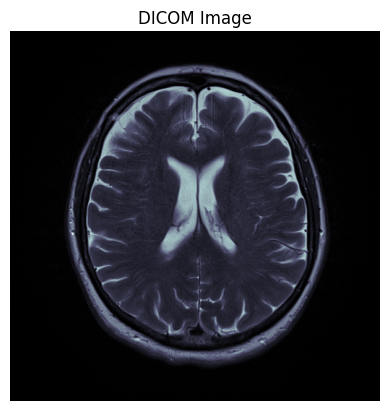

In [37]:
#read the DICOM file
filename = pydicom.dcmread("Images/Head_MRI.dcm")
#read the image pixel values
mri = filename.pixel_array

# Display the image
plt.imshow(mri, cmap=plt.cm.bone)
plt.title("DICOM Image")
plt.axis('off')
plt.show()

read other images

In [25]:
bdot =mpimg.imread("Images/blackdot.jpg")
atm =mpimg.imread("Images/atm.jpg")
box =mpimg.imread("Images/box.jpg")
grey =mpimg.imread("Images/grey.png")

Define the functions

In [32]:
# Function for RLE encoding
def run_length_encode(image):
    # Flatten the image into a 1D array
    flat_image = image.flatten()

    # Perform run-length encoding
    rle = []
    count = 1
    for i in range(1, len(flat_image)):
        if flat_image[i] == flat_image[i - 1]:
            count += 1
        else:
            rle.append((flat_image[i - 1], count))
            count = 1
    # Add the last run
    rle.append((flat_image[-1], count))

    return rle

#Importing required libraries for Huffman Encoding
import heapq
from collections import defaultdict
#Functions for Hoffman Encoding
def build_frequency_dict(image):
    frequency_dict = defaultdict(int)
    for pixel in image.flatten():
        frequency_dict[pixel] += 1
    return frequency_dict

def build_huffman_tree(frequency_dict):
    heap = [[weight, [pixel, ""]] for pixel, weight in frequency_dict.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])

    return sorted(heapq.heappop(heap)[1:], key=lambda p: len(p[1]))

def huffman_encode(image):
    frequency_dict = build_frequency_dict(image)
    huffman_codes = dict(build_huffman_tree(frequency_dict))

    encoded_data = ''.join([huffman_codes[pixel] for pixel in image.flatten()])
    return encoded_data, huffman_codes

def huffman_decode(encoded_data, huffman_codes):
    reverse_codes = {v: k for k, v in huffman_codes.items()}
    current_code = ""
    decoded_data = []

    for bit in encoded_data:
        current_code += bit
        if current_code in reverse_codes:
            decoded_data.append(reverse_codes[current_code])
            current_code = ""

    return np.array(decoded_data).reshape(image.shape)

def calculate_compression_ratio(original_size, compressed_size):
    return original_size / compressed_size


Apply image compression

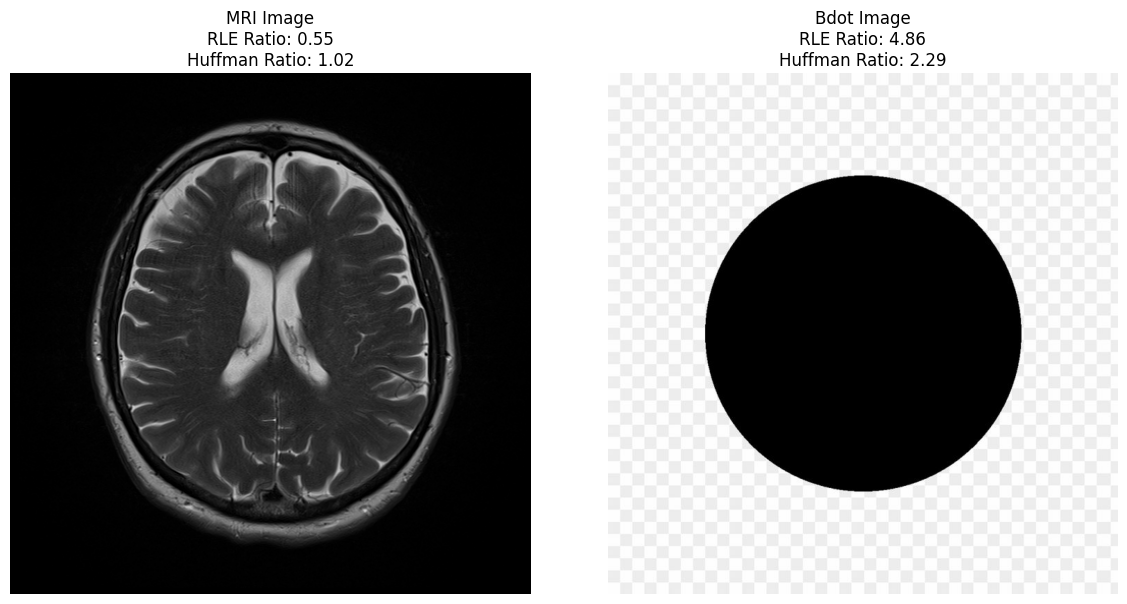

In [ ]:
# Perform RLE and Huffman encoding for both images
rle_mri = run_length_encode(mri)
encoded_data_mri, _ = huffman_encode(mri)
rle_bdot = run_length_encode(bdot)
encoded_data_bdot, _ = huffman_encode(bdot)
# Calculate compression ratios
original_size_mri = mri.size
compressed_size_rle_mri = sum([2 for _ in rle_mri]) # Each run is stored as a tuple of (value, count)
compressed_size_huffman_mri = len(encoded_data_mri) / 8  # encoded data is in bits
compression_ratio_rle_mri = original_size_mri / compressed_size_rle_mri
compression_ratio_huffman_mri = original_size_mri / compressed_size_huffman_mri
original_size_bdot = bdot.size
compressed_size_rle_bdot = sum([2 for _ in rle_bdot])
compressed_size_huffman_bdot = len(encoded_data_bdot) / 8
compression_ratio_rle_bdot = original_size_bdot / compressed_size_rle_bdot
compression_ratio_huffman_bdot = original_size_bdot / compressed_size_huffman_bdot
# Plot the images with their compression ratios
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(mri, cmap='gray')
axes[0].set_title(f'MRI Image\nRLE Ratio: {compression_ratio_rle_mri:.2f}\nHuffman Ratio: {compression_ratio_huffman_mri:.2f}')
axes[0].axis('off')
axes[1].imshow(bdot)
axes[1].set_title(f'Bdot Image\nRLE Ratio: {compression_ratio_rle_bdot:.2f}\nHuffman Ratio: {compression_ratio_huffman_bdot:.2f}')
axes[1].axis('off')
plt.tight_layout()
plt.show()
